# 1. Exploratory Data Analysis (EDA)

# 1.1 Loading the Data

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

# Load the data

df = pd.read_csv('F:\SOC 23\heart+disease\dataset.csv')
df.sample(5)


,Age,Sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
52,44,1,4,112,290,0,2,153,0,0,1,1,3,2
132,29,1,2,130,204,0,2,202,0,0,1,0,3,0
529,63,1,4,96,305,0,1,121,1,1,1,?,?,1
342,52,1,4,95,0,?,0,82,1,?,?,?,?,2
671,59,1,3,130,318,0,0,120,1,1,2,-9,3,0


# 1.2 Data Exploration

In [2]:
df.shape

(920, 14)

In [3]:
df = df.iloc[:303]

In [4]:
df.replace('?',np.nan, inplace=True)

In [5]:
df.isnull().sum()

Age         0
Sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [6]:
columns_to_convert = ['trestbps', 'chol', 'thalch','oldpeak','fbs','restecg','exang','slope','ca','thal']

# Loop through the columns and apply the conversion
for col_name in columns_to_convert:
    df[col_name] = pd.to_numeric(df[col_name], errors='coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       303 non-null    int64  
 1   Sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalch    303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,303.000,54.439,9.039,29.000,48.000,56.000,61.000,77.000
Sex,303.000,0.680,0.467,0.000,0.000,1.000,1.000,1.000
cp,303.000,3.158,0.960,1.000,3.000,3.000,4.000,4.000
trestbps,303.000,131.690,17.600,94.000,120.000,130.000,140.000,200.000
chol,303.000,246.693,51.777,126.000,211.000,241.000,275.000,564.000
fbs,303.000,0.149,0.356,0.000,0.000,0.000,0.000,1.000
restecg,303.000,0.990,0.995,0.000,0.000,1.000,2.000,2.000
thalch,303.000,149.607,22.875,71.000,133.500,153.000,166.000,202.000
exang,303.000,0.327,0.470,0.000,0.000,0.000,1.000,1.000
oldpeak,303.000,1.040,1.161,0.000,0.000,0.800,1.600,6.200


# 1.3 Age Group Analysis

In [9]:
# Age Group
df['Age_Group'] = pd.cut(df['Age'], bins=[-1, 30, 50, float('inf')],
                         labels=['Young Adults', 'Middle-Aged', 'Seniors'])
df.head()

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,Age_Group
0,63,1,1,145,233,1,2,150,0,2.300,3,0.000,6.000,0,Seniors
1,67,1,4,160,286,0,2,108,1,1.500,2,3.000,3.000,2,Seniors
2,67,1,4,120,229,0,2,129,1,2.600,2,2.000,7.000,1,Seniors
3,37,1,3,130,250,0,0,187,0,3.500,3,0.000,3.000,0,Middle-Aged
4,41,0,2,130,204,0,2,172,0,1.400,1,0.000,3.000,0,Middle-Aged


# Handling Missing Values

In [10]:
# We need to fill NaN to be able to build the model.
missing_ones = df.isnull().sum()[df.isnull().sum()>0].index

print(missing_ones)

def fill_based_cat(data,columns,based_cat,metric):
    data = data.copy()
    for col in columns:
        data[col] = data[col].fillna(df.groupby(based_cat)[col].transform(metric))
    return data

df = fill_based_cat(df,missing_ones,based_cat="Age_Group",metric="median")

Index(['ca', 'thal'], dtype='object')


In [11]:
df.isnull().sum()

Age          0
Sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
num          0
Age_Group    0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Age        303 non-null    int64   
 1   Sex        303 non-null    int64   
 2   cp         303 non-null    int64   
 3   trestbps   303 non-null    int64   
 4   chol       303 non-null    int64   
 5   fbs        303 non-null    int64   
 6   restecg    303 non-null    int64   
 7   thalch     303 non-null    int64   
 8   exang      303 non-null    int64   
 9   oldpeak    303 non-null    float64 
 10  slope      303 non-null    int64   
 11  ca         303 non-null    float64 
 12  thal       303 non-null    float64 
 13  num        303 non-null    int64   
 14  Age_Group  303 non-null    category
dtypes: category(1), float64(3), int64(11)
memory usage: 33.7 KB


# 1.4 Outlier Analysis

In [13]:
# Outlier Analysis
def outlier_thresholds (dataframe, col_name, q1=0.25, q3=0.75) :
   
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquartile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquartile_range
    low_limit = quartile1 - 1.5 * interquartile_range
    return low_limit, up_limit

In [14]:
outlier_thresholds(df, 'chol')

(115.0, 371.0)

In [15]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    outliers = (dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)
    if outliers.any():
        return True
    else:
        return False

In [16]:
check_outlier(df, 'chol')

True

# 1.5 Numerical and Categorical Variables

In [17]:

num_list = ['Age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'Sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
cat_list = ['Age_Group']

# 1.6 Correlation Analysis

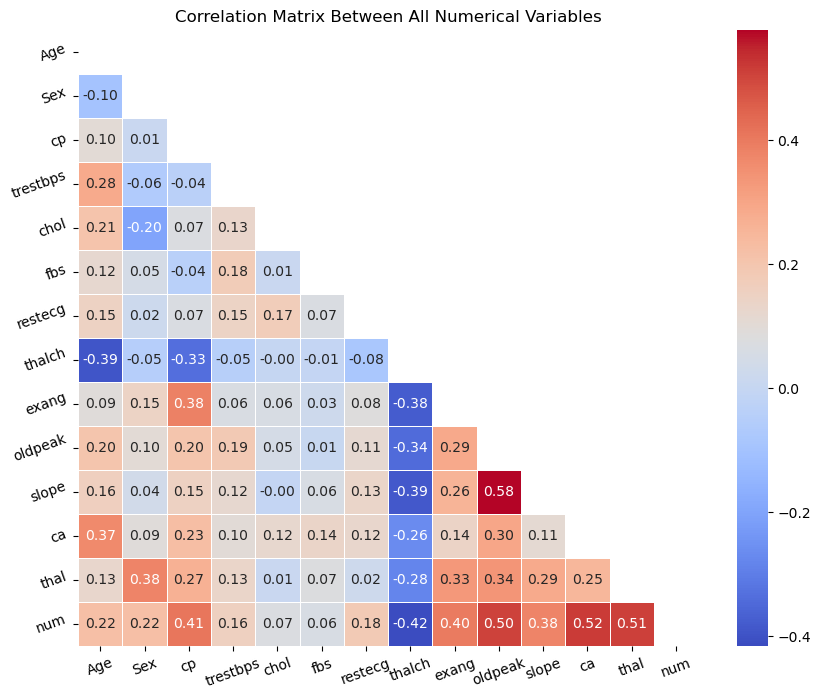

In [18]:
num_list2 = df.select_dtypes(include=['float64', 'int64'])

def correlation_analysis(dataframe):
    """
    Calculates and visualizes correlations between all numerical variables.

    Parameters
    - Data: Pandas DataFrame, the data set to be analyzed for correlation.
    """
    # Calculate correlations between all variables
    num_list2 = df.select_dtypes(include=['float64', 'int64'])
    corr_matrix = num_list2.corr()

    # Use heatmap for visualization
    plt.figure(figsize=(10, 8))
    mask = np.triu(np.ones_like(corr_matrix))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5,mask=mask )
    plt.xticks(rotation=20)
    plt.yticks(rotation=20)
    plt.title("Correlation Matrix Between All Numerical Variables")
    plt.show()

correlation_analysis(num_list2)

# 2. Data Preprocessing and Feature Engineering

# 2.1 Re-assignment with Outlier Thresholds

In [19]:
def replace_with_thresholds (dataframe, variable) :
    low_limit , up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

for col in num_list:
    print(col, check_outlier(df, col))
print(" ")
for col in num_list:
    replace_with_thresholds (df, col)
    print(col, check_outlier(df, col))
print(" ")


Age False
trestbps True
chol True
thalch True
oldpeak True
Sex False
cp True
fbs True
restecg False
exang False
slope False
ca True
thal False
 
Age False
trestbps False
chol False
thalch False
oldpeak False
Sex False
cp False
fbs False
restecg False
exang False
slope False
ca False
thal False
 
Age False
trestbps False
chol False
thalch False
oldpeak False
Sex False
cp False
fbs False
restecg False
exang False
slope False
ca False
thal False


# 2.2 One Hot Encoding

In [20]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

df = one_hot_encoder(df, categorical_cols=['Age_Group'])

In [21]:
df.sample(5)

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,Age_Group_Middle-Aged,Age_Group_Seniors
167,54.000,0.000,2.000,132,288,0,2,159.000,1.000,0.000,1.000,1.000,3.000,0,0,1
75,65.000,0.000,3.000,160,360,0,2,151.000,0.000,0.800,1.000,0.000,3.000,0,0,1
177,56.000,1.000,4.000,132,184,0,2,105.000,1.000,2.100,2.000,1.000,6.000,1,0,1
145,47.000,1.000,3.000,108,243,0,0,152.000,0.000,0.000,1.000,0.000,3.000,1,1,0
132,29.000,1.000,2.000,130,204,0,2,202.000,0.000,0.000,1.000,0.000,3.000,0,0,0


# 2.3 Standardization

In [22]:
scaler = StandardScaler()
df[num_list] = scaler.fit_transform(df[num_list])
df[num_list].head()

,Age,trestbps,chol,thalch,oldpeak,Sex,cp,fbs,restecg,exang,slope,ca,thal
0,0.949,0.821,-0.265,0.015,1.151,0.686,-1.930,0.000,1.017,-0.697,2.275,-0.746,0.651
1,1.392,1.724,0.851,-1.835,0.429,0.686,0.914,0.000,1.017,1.435,0.649,2.181,-0.902
2,1.392,-0.683,-0.349,-0.910,1.422,0.686,0.914,0.000,1.017,1.435,0.649,1.596,1.168
3,-1.933,-0.081,0.093,1.646,2.234,0.686,-0.223,0.000,-0.997,-0.697,2.275,-0.746,-0.902
4,-1.489,-0.081,-0.876,0.985,0.339,-1.457,-1.361,0.000,1.017,-0.697,-0.976,-0.746,-0.902


In [23]:
df.sample(5)

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,Age_Group_Middle-Aged,Age_Group_Seniors
241,-1.489,-1.457,-1.361,-0.322,1.272,0.000,-0.997,0.588,-0.697,-0.924,-0.976,-0.746,-0.902,0,1,0
127,-0.049,0.686,0.914,-1.284,-0.139,0.000,-0.997,-1.042,1.435,1.602,0.649,0.425,1.168,3,0,1
99,-0.714,0.686,0.914,-0.562,-0.497,0.000,1.017,1.602,-0.697,-0.924,-0.976,-0.746,-0.902,0,1,0
168,-2.154,0.686,0.914,-0.322,0.767,0.000,1.017,0.280,1.435,-0.924,-0.976,-0.746,1.168,1,1,0
297,0.284,-1.457,0.914,0.521,-0.097,0.000,-0.997,-1.174,1.435,-0.744,0.649,-0.746,1.168,1,0,1


# 3. Model Development

# 3.1 Splitting the Data

In [24]:
y = df["num"]
X = df.drop(["num"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

# Random Forest Classifier

In [25]:
rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
score=accuracy_score(y_pred, y_test)
print(score)

0.5714285714285714


# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression


lr_model = LogisticRegression().fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
score_lr = accuracy_score(y_pred_lr, y_test)
print("Logistic Regression Accuracy:", score_lr)

Logistic Regression Accuracy: 0.5164835164835165


# Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier


dt_model = DecisionTreeClassifier(random_state=46).fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
score_dt = accuracy_score(y_pred_dt, y_test)
print("Decision Trees Accuracy:", score_dt)

Decision Trees Accuracy: 0.4835164835164835


# XGBoost

In [28]:
from xgboost import XGBClassifier


xgb_model = XGBClassifier(random_state=46).fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
score_xgb = accuracy_score(y_pred_xgb, y_test)
print("XGBoost Accuracy:", score_xgb)

XGBoost Accuracy: 0.5054945054945055


# SVM ,Naive Bayes and KNN

In [29]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# SVM
svm_model = SVC(random_state=46).fit(X_train, y_train)
y_svm_pred = svm_model.predict(X_test)
svm_score = accuracy_score(y_svm_pred, y_test)
print("SVM Accuracy:", svm_score)

# Naive Bayes
nb_model = GaussianNB().fit(X_train, y_train)
y_nb_pred = nb_model.predict(X_test)
nb_score = accuracy_score(y_nb_pred, y_test)
print("Naive Bayes Accuracy:", nb_score)

# k-Nearest Neighbors
knn_model = KNeighborsClassifier().fit(X_train, y_train)
y_knn_pred = knn_model.predict(X_test)
knn_score = accuracy_score(y_knn_pred, y_test)
print("k-Nearest Neighbors Accuracy:", knn_score)

SVM Accuracy: 0.5714285714285714
Naive Bayes Accuracy: 0.45054945054945056
k-Nearest Neighbors Accuracy: 0.5494505494505495
